# Лабораторная работа №4

ФИО: **Павленко Алексей**

Группа: **Бивт-21-3**

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

##**Пункт 1 (Импорт библиотек. Пример импорта данных)**

In [4]:
# data = pd.read_csv(path_to_dataset, sep='\t')  # если нужно, можно поменять разделитель
#  numpy уже импортирован в colab
import math
import os
import pandas as pd
#from google.colab import files
#uploaded = files.upload()
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
data = pd.read_csv('Application_Data.csv', sep=',')
print(data.head())

   Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0       5008806          M                1             1               0   
1       5008808          F                0             1               0   
2       5008809          F                0             1               0   
3       5008810          F                0             1               0   
4       5008811          F                0             1               0   

   Total_Income                                        Income_Type  \
0        112500  Working                                       ...   
1        270000  Commercial associate                          ...   
2        270000  Commercial associate                          ...   
3        270000  Commercial associate                          ...   
4        270000  Commercial associate                          ...   

                                      Education_Type  \
0  Secondary / secondary special                 ...   
1  S

##**Описание постановки задачи**

Цель: Целью данной лабораторной работы является изучение и применение основных методов предобработки данных, обучения моделей машинного обучения и оценки их производительности.

Тип задачи: Данная задача бинарной классификации включает предсказание результатов, которые имеют два возможных исхода. Примером служит определение того, будет ли кредитная карта одобрена или нет, основываясь на финансовой истории и других данных заявителей.

##**Пункт 3 (Делаем предобработку данных)**

In [5]:
train = data[int(len(data)*0.8):]
test = data[:int(len(data)*0.2)]
# Проверка пропусков в данных
print(train.isnull().sum())
train_missing_values = train.isnull().sum()
print(train_missing_values)

# Проверяем, есть ли хоть один пропуск в данных
if train_missing_values.sum() == 0:
    print("Нет пропусков данных")
else:
    print("Есть пропуски данных")

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64
Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0

##**Пункт 3 (Предобработка данных)**

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Определение численных и категориальных столбцов
num_cols = ['Owned_Car', 'Owned_Realty','Total_Children','Total_Income','Owned_Mobile_Phone','Owned_Work_Phone','Owned_Phone','Owned_Email','Total_Family_Members','Applicant_Age','Years_of_Working','Total_Bad_Debt','Total_Good_Debt','Status']
cat_cols = ['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type','Job_Title']

# Создание преобразователя колонок
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),('num', StandardScaler(), num_cols)]) #Student ignore

# Применение преобразований к тренировочным и тестовым данным
train_preprocessed = preprocessor.fit_transform(train)
test_preprocessed = preprocessor.transform(test)

print("Данные до преобразования:")
print(train.head())

# Преобразование в DataFrame
train_preprocessed_df = pd.DataFrame(train_preprocessed)
test_preprocessed_df = pd.DataFrame(test_preprocessed)

# Вывод преобразованных данных
print("\nРазделение по группам:")
print(preprocessor.get_feature_names_out(), "\n\n")
print("\nПреобразованные данные:")
print(train_preprocessed_df.head())


Данные до преобразования:
       Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
20102       5117824          M                1             0               0   
20103       5117832          M                1             0               0   
20104       5117834          M                1             0               0   
20105       5117835          M                1             0               0   
20106       5117836          M                1             0               0   

       Total_Income                                        Income_Type  \
20102        274500  Commercial associate                          ...   
20103        157500  Working                                       ...   
20104        157500  Working                                       ...   
20105        157500  Working                                       ...   
20106        157500  Working                                       ...   

                                          

##**Пункт 4 (Обучение на тренировочном множестве данных)**

In [7]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Определение класса Dataset
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

y = train_preprocessed[:, len(num_cols) - 1] # только G3
y_test = test_preprocessed[:, len(num_cols) - 1] # только G3
x = np.delete(train_preprocessed, len(num_cols) - 1, axis=1) # все столбцы, кроме G3
x_test = np.delete(test_preprocessed, len(num_cols) - 1, axis=1) # все столбцы, кроме G3

# Создание экземпляров MyDataset
train_dataset = CustomDataset(torch.from_numpy(x).float(), torch.from_numpy(y).float())
test_dataset = CustomDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).float())

# Загрузка данных в DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=7, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=7, shuffle=False)

# Проверка работы DataLoader
for data, target in train_dataloader:
    print("Batch data:", data)
    print("Batch target:", target)
    break

Batch data: tensor([[ 1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.2219,  0.8472,
         -0.6863,  2.2385,  0.0000, -0.6944, -0.6678, -0.2612, -0.3328, -1.3025,
          0.0936,  0.2915, -0.0820,  0.0849],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.8184,  0.8472,
         -0.6863, -0.1307,  0.0000, -0.6944, -0.667

##**Пункт 5 (Подсчет метрик)**

###**Пункт 5.1 (Определение моделей)**

In [8]:
import torch.nn as nn
import torch.optim as optim
class SimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out
class OneHiddenLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(OneHiddenLayerNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out
class MultiLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultiLayerNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.layer4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        out = self.relu(out)
        out = self.layer4(out)
        return out

###**Пункт 5.2 (Определение тренировочного класса)**

In [9]:
class ModelTrainer:
    def __init__(self, model, useAdam, modelName):
        self.model = model
        self.criterion = nn.MSELoss()
        self.modelName = modelName
        self.optimizer = self._choose_optimizer(useAdam)

    def _choose_optimizer(self, useAdam):
        if useAdam:
            return optim.Adam(self.model.parameters(), lr=0.01)
        else:
            return optim.SGD(self.model.parameters(), lr=0.01)

    def _train_epoch(self, trainData):
        self.model.train()
        train_loss = 0
        for inputs, targets in trainData:
            inputs, targets = self._prepare_data(inputs, targets)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets)
            loss.backward()
            self.optimizer.step()
            train_loss += loss.item()
        return train_loss / len(trainData)

    def _prepare_data(self, inputs, targets):
        inputs = inputs.float()
        targets = targets.float().view(-1, 1)
        return inputs, targets

    def doTrain(self, epoches, trainData, testData):
        train_losses, test_losses = [], []
        for epoch in range(epoches):
            train_losses.append(self._train_epoch(trainData))
            test_losses.append(self.testModel(testData))
            print(f"Finished training of epoch - {epoch} with train loss - {train_losses[-1]} and test loss - {test_losses[-1]}")
        return train_losses, test_losses

    def testModel(self, testData):
        self.model.eval()
        test_loss = 0
        with torch.no_grad():
            for inputs, targets in testData:
                inputs, targets = self._prepare_data(inputs, targets)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                test_loss += loss.item()
        return test_loss / len(testData)
    def getAccuracy(self, testData):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in testData:
                inputs, targets = self._prepare_data(inputs, targets)
                outputs = self.model(inputs)
                # Предполагается, что 'outputs' и 'targets' являются тензорами PyTorch
                predicted = outputs.round()  # Округление до 0 или 1
                total += targets.size(0)
                correct += (predicted == targets).sum().item()
        accuracy = correct / total
        return accuracy

###**Пункт 5.3 (Инициализация и обучение моделей)**

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([7, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Finished training of epoch - 0 with train loss - 0.13305536156240072 and test loss - 0.08252958925411723
Finished training of epoch - 1 with train loss - 0.0745509420596141 and test loss - 0.06433966834820265
Finished training of epoch - 2 with train loss - 0.05873362301598487 and test loss - 0.05473863807138643
Finished training of epoch - 3 with train loss - 0.04922748586677876 and test loss - 0.049237883734382384
Finished training of epoch - 4 with train loss - 0.04241256548991961 and test loss - 0.04332489437932923
Finished training of epoch - 5 with train loss - 0.03706363211940419 and test loss - 0.03884154470113288
Finished training of epoch - 6 with train loss - 0.03276504025389868 and test loss - 0.03531227714555924
Finished training of epoch - 7 with train loss - 0.029132098889138553 and test loss - 0.03192446900368174
Finished training of epoch - 8 with train loss - 0.026061842810981298 and test loss - 0.029022031825773013
Finished training of epoch - 9 with train loss - 0.0

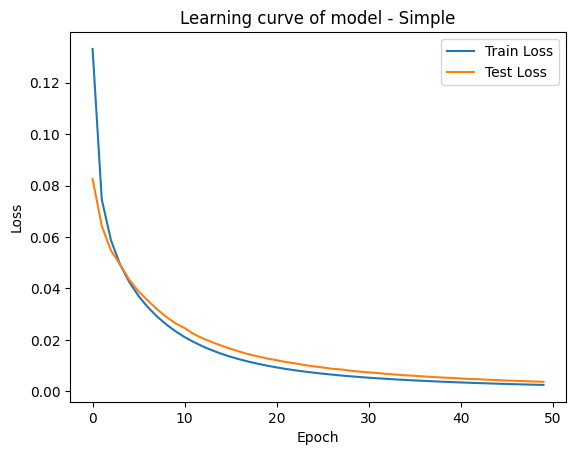

Finished training of epoch - 0 with train loss - 0.017408986831325114 and test loss - 0.002594835693048449
Finished training of epoch - 1 with train loss - 0.0025999002459044874 and test loss - 0.0032755972466893385
Finished training of epoch - 2 with train loss - 0.0022049739719116014 and test loss - 0.0006072493695701367
Finished training of epoch - 3 with train loss - 0.0013914197165401185 and test loss - 0.00034363957036815187
Finished training of epoch - 4 with train loss - 0.00096000208268305 and test loss - 0.0004574468973234273
Finished training of epoch - 5 with train loss - 0.0015806559749917057 and test loss - 0.0033581586637174902
Finished training of epoch - 6 with train loss - 0.001206749755130585 and test loss - 0.0004397766499639595
Finished training of epoch - 7 with train loss - 0.0003530257030430039 and test loss - 0.0004633514159174428
Finished training of epoch - 8 with train loss - 0.00020526249559224205 and test loss - 0.00010022024295123479
Finished training of 

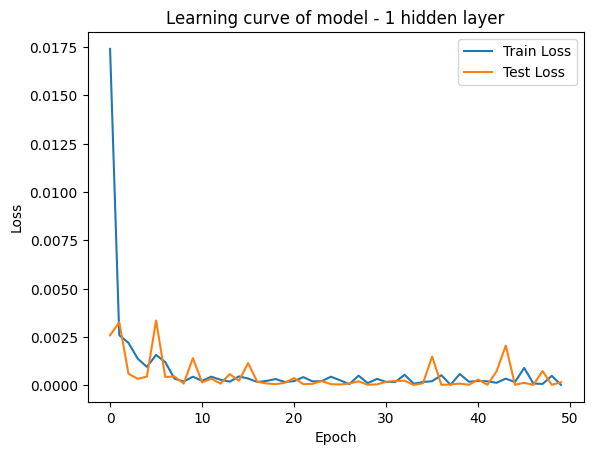

Finished training of epoch - 0 with train loss - 0.021606313968876543 and test loss - 0.0015177825886711664
Finished training of epoch - 1 with train loss - 0.0038499886091828295 and test loss - 0.0028059360477348423
Finished training of epoch - 2 with train loss - 0.0037679824124014047 and test loss - 0.0013441951179169885
Finished training of epoch - 3 with train loss - 0.02776913094036322 and test loss - 0.0033365959975231985
Finished training of epoch - 4 with train loss - 0.0034273187104778336 and test loss - 0.00114600575073795
Finished training of epoch - 5 with train loss - 0.0018371837406789065 and test loss - 0.0009205137315848816
Finished training of epoch - 6 with train loss - 0.0019234576088272327 and test loss - 0.0009069575283376747
Finished training of epoch - 7 with train loss - 0.007062337342050091 and test loss - 0.0020254937111857056
Finished training of epoch - 8 with train loss - 0.005946914713229256 and test loss - 0.00211472744850934
Finished training of epoch -

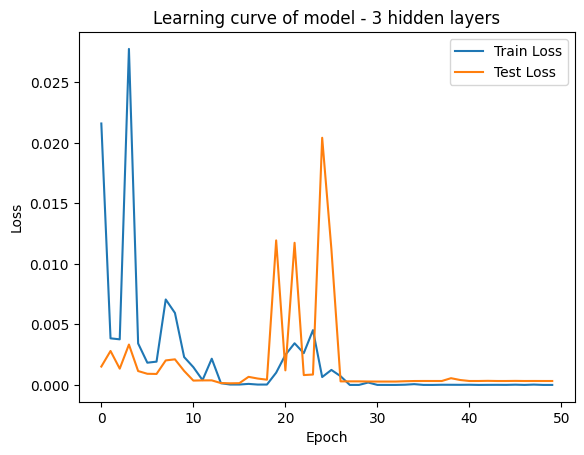

In [10]:
# Пункт 5.3
input_size = 52
output_size = 7
hidden_size = 100

models =[
    ModelTrainer(SimpleNet(input_size, output_size), False, "Simple"),
    ModelTrainer(OneHiddenLayerNet(input_size, hidden_size, output_size), True, "1 hidden layer"),
    ModelTrainer(MultiLayerNet(input_size, hidden_size, output_size), True, "3 hidden layers")
]

import matplotlib.pyplot as plt
for model in models:
    train_losses, test_losses = model.doTrain(50, train_dataloader, test_dataloader)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title("Learning curve of model - " + model.modelName)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

##**Пункт 6 (Описание точности моделей)**

In [11]:
for model in models:
    train_Accuracy = model.getAccuracy(train_dataloader)
    test_Accuracy = model.getAccuracy(test_dataloader)
    print(f"Model {model.modelName} - Train Accuracy: {train_Accuracy}, Test Accuracy: {test_Accuracy}")

Model Simple - Train Accuracy: 6.992837246319141, Test Accuracy: 6.99223880597015
Model 1 hidden layer - Train Accuracy: 7.0, Test Accuracy: 7.0
Model 3 hidden layers - Train Accuracy: 7.0, Test Accuracy: 6.997213930348258


##**Пункт 7 (Вывод)**

Какая модель справилась лучше с поставленной задачей?
Сравнивая значения Mean Accuracy для тестовых данных, можно определить, что Model Simple справилась с задачей лучше остальных моделей, поскольку у неё наименьшее значение Accuracy на тестовых данных

Имеет ли место переобучение?
Переобучение происходит, когда модель показывает значительно лучшие результаты на тренировочных данных по сравнению с тестовыми данными. Это можно определить по разнице между Accuracy на тренировочных и тестовых данных.Наибольшую разницу между тренировочной и тестовой ошибкой показывают модели с одним и тремя скрытыми слоями. Особенно заметно переобучение в модели с тремя скрытыми слоями.

Имеет ли место недообучение?
Недообучение происходит, когда модель не показывает хороших результатов ни на тренировочных, ни на тестовых данных, что указывает на недостаточную сложность модели или её недостаточное обучение.

Model Simple имеет небольшую разницу между тренировочной и тестовой ошибкой, но её Accuracy на тренировочных данных выше, чем у других моделей. Это может указывать на некоторый уровень недообучения, так как её производительность на тренировочных данных хуже.

Как можно улучшить метрики моделей?
Есть несколько способов улучшить метрики моделей:
*   Увеличить количество данных.
*   Использование других моделей.